# <font color = 'pickle'> **Learning Outcomes**
- Should be able to do EDA
- Create Preprocesssing pipeline
- Apply KNN classification model and tune hyperparameters
- Make learning curve and interpret them


#<font color = 'pickle'>  **Problem Statement**
- We will use the churn dataset used in earlier modules. I have modified the dataset to make i balnaced and added some more missing values.


# <font color = 'pickle'> **Data Dictionary**</font>

 1. **RowNumber** - Gives the row number. 
 2. **CustomerId** - The ID of the customer.
 1.  **CreditScore** - The credit score attained by  the customer.
 2.  **Geography** - The Country of the customer. 
 3.  **Gender** - The gender of the customer.          
 4.   **Age**    - Age of the customer.          
 5.   **Tenure** - How many years the customer is with the company?       
 6.   **Balance** - Balance in the credit card         
 7.   **NumOfProducts** - Number of products bought by the customer by using credit card  
 8.   **HasCrCard** - Whether the customer has the credit card or not.         
 9.   **IsActiveMember** - Does the customer have active membership?     
 10.  **EstimatedSalary** - Estimated salary of the customer. 
 11.  **Exited** - churn(whether the customer left the company or not)


# <font color = 'pickle'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

     |████████████████████████████████| 276 kB 2.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import feature_engine

In [ ]:
print(feature_engine.__version__)

1.4.0


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.0.2


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# For splitting the dataset
from sklearn.model_selection import train_test_split

# drop arbitrary features
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import DecisionTreeEncoder

# Missing value imputation
from feature_engine.imputation import MeanMedianImputer

# impute missingvalues with arbitrary number
from feature_engine.imputation import ArbitraryNumberImputer

# add missing indicator 
from feature_engine.imputation import AddMissingIndicator

# categorical imputer
from feature_engine.imputation import CategoricalImputer

# random sample imputer
from feature_engine.imputation import RandomSampleImputer

# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogTransformer

# DIscretization
from sklearn.preprocessing import KBinsDiscretizer

# Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper

# creating pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# <font color = 'pickle'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/data/custom-functions']

In [ ]:
from  plot_learning_curve import plot_learning_curve

In [ ]:
plot_learning_curve??

ERROR:root:Exception raised in ColabInspector._getdef
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_inspector.py", line 390, in _getdef
    if v.default != v.empty:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

# <font color = 'pickle'>**Import the dataset**
Next, we will create variables to store paths where the data exists and where we will save the model. 

Now, we will create a variable to store the specific data file path from the data source folder.

In [ ]:
file = data_folder / 'modified_churn.csv'

Now, we will create a data-frame using the above file path and Pandas....  

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


# <font color = 'pickle'>**Exploratory data analysis**

## <font color = 'pickle'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'pickle'>**Check few rows**

In [ ]:
# check the top 5 rows
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,7542,15649430,White,723,France,Male,28.0,4.0,0.00,2.0,1,1,123885.88,0
1,1,1675,15675896,Gough,680,NaN,Female,42.0,7.0,105722.69,1.0,1,1,90558.24,1
2,2,3555,15662865,Storey,658,Spain,Male,36.0,1.0,0.00,2.0,0,1,84927.42,0
3,3,7145,15577515,Sung,554,Germany,Female,NaN,0.0,108477.27,1.0,0,1,140003.00,1
4,4,3128,15721007,Charlton,776,Germany,Male,33.0,8.0,115130.34,1.0,0,0,129525.50,1


###  <font color = 'pickle'>**Check column names**

In [ ]:
# Let's check the columns of the data
df.columns

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### <font color = 'pickle'>**Check data types of columns**

In [ ]:
# check the data type for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


Although the data type of HasCrCard and IsActiveMember is int64, we know that these are categorical variables.
Hence, we will change the datatype to object

In [ ]:
# change data type to object
for var in ['HasCrCard' ,'IsActiveMember']:
  df[var]= df[var].astype('object')

In [ ]:
# check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   object 
 12  IsActiveMember   4074 non-null   object 
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 477.5+ KB


### <font color = 'pickle'>**Check for unnecessary columns**

Columns such as RowNumber, CustomerId, and Surname are unnecessary columns.

We don't need these columns for our analysis as these columns doesn't contain any pattern.

So, we can drop these columns.

### <font color = 'pickle'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [ ]:
# Identify Columns that Contain a Single value
# we will use nunique() function to get number of unique values for each column
# We can delete the columns which have single values 
df.nunique()

Unnamed: 0         4074
RowNumber          4074
CustomerId         4074
Surname            1821
CreditScore         446
Geography             3
Gender                2
Age                  66
Tenure               11
Balance            2775
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    4074
Exited                2
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'pickle'>**Check summary statistics**

In [ ]:
# We will use describe function and then take the transpose for better visualization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4074.0,2.036500e+03,1176.206827,0.00,1018.25,2036.50,3.054750e+03,4073.00
RowNumber,4074.0,4.994573e+03,2890.837174,1.00,2501.25,5006.50,7.506750e+03,10000.00
CustomerId,4074.0,1.568945e+07,72277.562698,15565706.00,15627214.00,15687773.50,1.575194e+07,15815656.00
CreditScore,4074.0,6.473130e+02,97.879230,350.00,580.00,648.00,7.150000e+02,850.00
Age,3543.0,4.095145e+01,10.612252,18.00,33.00,40.00,4.700000e+01,92.00
Tenure,4072.0,4.958743e+00,2.917142,0.00,2.00,5.00,7.000000e+00,10.00
Balance,4067.0,8.173178e+04,61126.863817,0.00,0.00,103018.45,1.288796e+05,250898.09
NumOfProducts,4070.0,1.503686e+00,0.672722,1.00,1.00,1.00,2.000000e+00,4.00
EstimatedSalary,4074.0,1.008552e+05,57176.566787,11.58,52697.88,100825.74,1.499074e+05,199909.32
Exited,4074.0,5.000000e-01,0.500061,0.00,0.00,0.50,1.000000e+00,1.00


### <font color = 'pickle'>**Check for duplicate rows**

In [ ]:
# To check the duplicates of the data
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Unnamed: 0, RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


From the given results, we can check that there are no duplicates in our data.

## <font color = 'pickle'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [ ]:
# check missing values in data
df.isna()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4070,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4072,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# calculate % of mssing values for each column
df.isna().mean()*100

Unnamed: 0          0.000000
RowNumber           0.000000
CustomerId          0.000000
Surname             0.000000
CreditScore         0.000000
Geography          12.002946
Gender              1.006382
Age                13.033873
Tenure              0.049092
Balance             0.171821
NumOfProducts       0.098184
HasCrCard           0.000000
IsActiveMember      0.000000
EstimatedSalary     0.000000
Exited              0.000000
dtype: float64

* We can see that there are six columns with missing values.

## <font color = 'pickle'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [ ]:
# Create a list of categorical variables
# Since the dtype of categorical variable is Object we can compare the values with 'O' 
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Create a list of discrete variables
# we do not want to consider Exited as this is target variable
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 20 and var not in ['Exited']
]

# Create a list of continuous Variables
# We don't wan't to consider CustomerId here
# we do not want to consider Exited as this is target variable
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    if var not in discrete and var not in ['CustomerId'] and var not in ['Exited']
]

In [ ]:
# check continous Variables
continuous

['Unnamed: 0', 'RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# check categorical variables
categorical

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
# check discrete variables
discrete

['Tenure', 'NumOfProducts']

### <font color = 'pickle'>**Check unique values for variables**

In [ ]:
# Check number of unique values for discrete variables
total_unique_values= df[discrete].nunique()
for key, value in total_unique_values.items():
    if value > 0:
        print(key,":",value)

Tenure : 11
NumOfProducts : 4


In [ ]:
# check values for discrete variables
for var in discrete:
    print(var, df[var].unique(), '\n')

Tenure [ 4.  7.  1.  0.  8.  3.  2.  5.  9. 10.  6. nan] 

NumOfProducts [ 2.  1.  3.  4. nan] 



In [ ]:
# Check number of unique values for continuous variables
total_unique_values= df[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Unnamed: 0 : 4074
RowNumber : 4074
CreditScore : 446
Age : 66
Balance : 2775
EstimatedSalary : 4074


In [ ]:
# check values for continuous variables
# we will check the first 20 values
for var in continuous:
    print(var, df[var].unique()[0:20], '\n')

Unnamed: 0 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

RowNumber [7542 1675 3555 7145 3128 5895 8698 4141  582 4156 1647 9815 3899 5100
  173 1275 1024 8353 6244 6197] 

CreditScore [723 680 658 554 776 583 751 841 607 587 570 631 662 595 480 562 642 608
 698 700] 

Age [28. 42. 36. nan 33. 39. 37. 41. 50. 59. 45. 44. 32. 29. 26. 24. 48. 19.
 20. 46.] 

Balance [     0.   105722.69 108477.27 115130.34 129299.28  99773.85 154969.79
 108431.87  85109.21 129293.74 104568.41 106000.12 129608.57 161628.66
 155393.98 102772.67  95167.55 137648.41 135096.77 137998.2 ] 

EstimatedSalary [123885.88  90558.24  84927.42 140003.   129525.5   73107.6   54865.92
  99505.75 109291.39   1557.82 177805.44 133141.34   8059.44 191448.96
   5472.7   91482.5   88698.83  13308.2   70705.58 152723.23] 



In [ ]:
# Check number of unique values for categorical variables
total_unique_values= df[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Surname : 1821
Geography : 3
Gender : 2
HasCrCard : 2
IsActiveMember : 2


In [ ]:
# check values for categorical variables
for var in categorical:
    print(var, df[var].unique(), '\n')

Surname ['White' 'Gough' 'Storey' ... 'Odili' 'Elkins' 'Sandefur'] 

Geography ['France' nan 'Spain' 'Germany'] 

Gender ['Male' 'Female' nan] 

HasCrCard [1 0] 

IsActiveMember [1 0] 



## <font color = 'pickle'>**Check Variable Distributions**

### <font color = 'pickle'>**Categorical Varibles**




#### Frequency distribution of categorical variables and rare categories

* We can define a category as rare if it appears in less than 5% or 1% of the given dataset.
- We first calculate the number of observations in each category.
- We then divide them by the total number of observations to obtain the percentage of observations in each category.
If percentage observation in any category is less than the threshold (e.g., 5%), we can treat these as rare categories.<br>

Rare categories or labels can lead to the following issues:

- Uneven distribution between train and test splits.
- Overfitting in tree-based models.
- Operational issues (new labels in a test that were not in the train data set).


In [ ]:
# Let's check the columns with categorical variables
df[categorical].head()

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,White,France,Male,1,1
1,Gough,NaN,Female,1,1
2,Storey,Spain,Male,0,1
3,Sung,Germany,Female,0,1
4,Charlton,Germany,Male,0,0


In [ ]:
cat_freq = 100 * df['Geography'].value_counts(normalize=True)
print(cat_freq)

France     46.359833
Germany    30.460251
Spain      23.179916
Name: Geography, dtype: float64


Now, let's make a bar plot for displaying the frequency of each category.
* Then, we will also  highlight the 5% mark with a red line as follows :

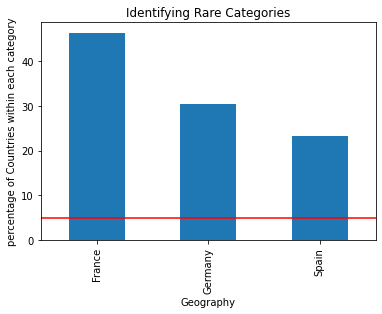

In [ ]:
fig = cat_freq.sort_values(ascending=False).plot.bar() # .plot.bar() will plot bar-plot.
fig.axhline(y=5, color='red') # axhline(y=0.05, color='red') will plot horizontal red line at y = 0.05
fig.set_ylabel('percentage of Countries within each category')
fig.set_xlabel('Geography')
fig.set_title('Identifying Rare Categories')
plt.show()

We can observe from the above barplot that we don't have any rare categories in the data. Similarly, we can check the rare categories for other categorical variables.

#### <font color = 'pickle'> **Check distribution of target variable**

In [ ]:
# Frequency for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company  
print(df['Exited'].value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


In [ ]:
# Precantage for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company  
print(f"{100 * df['Exited'].value_counts(normalize=True)} ")

0    50.0
1    50.0
Name: Exited, dtype: float64 


From the above analysis, we can observe that 50% of the people did not exit the company or didn't churn out.
 <font color = 'indianred'> We can see that the dataset is **balanced** i.e. we have equal number of observation for eacg class for labels.</font> 

### <font color = 'pickle'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

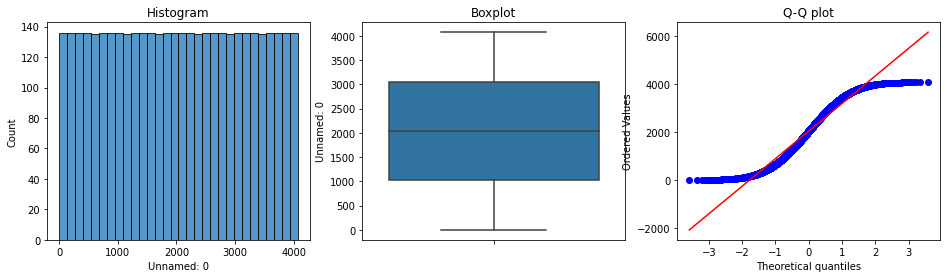

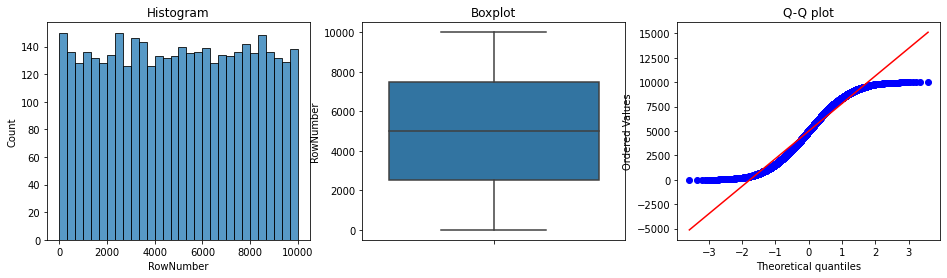

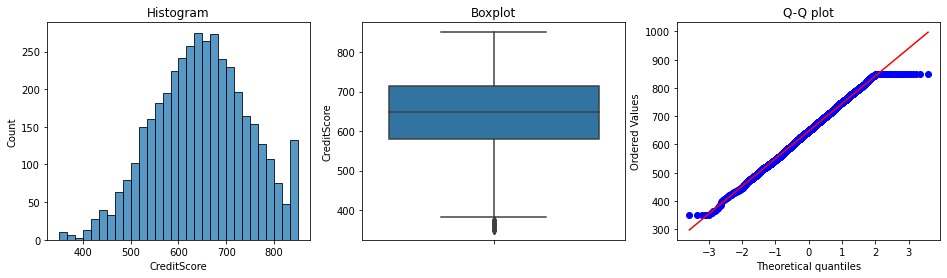

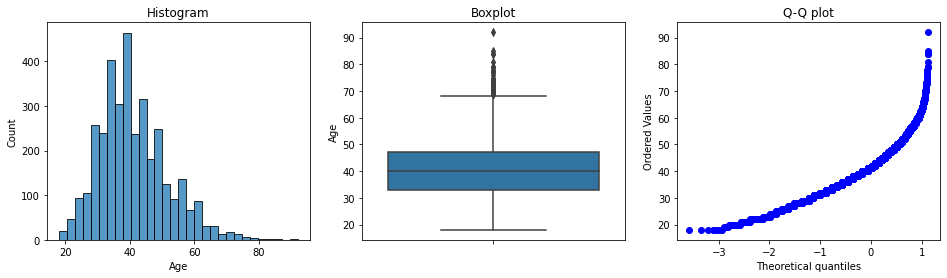

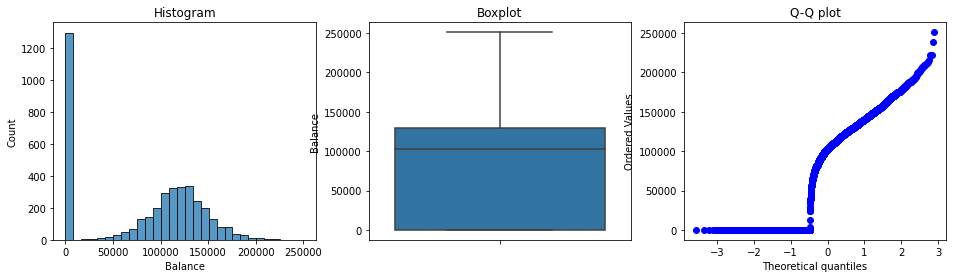

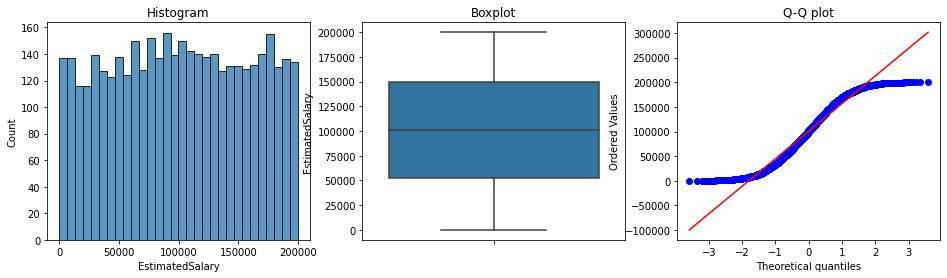

In [ ]:
for var in continuous:
    diagnostic_plots(df, var)

From the above plots, we can see that 
* age has skewed distribution and has some outliers as well. We can use transformation to make it normal.
* Estimated salary has uniform distribution.
* Balance has lot of zeros. 


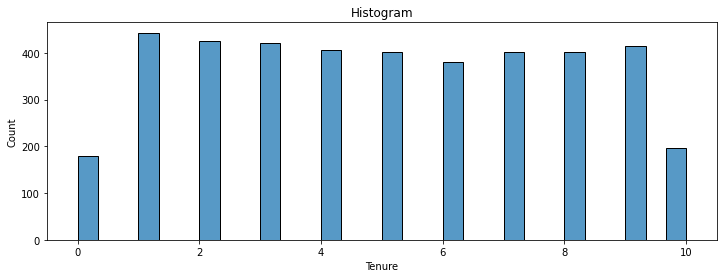

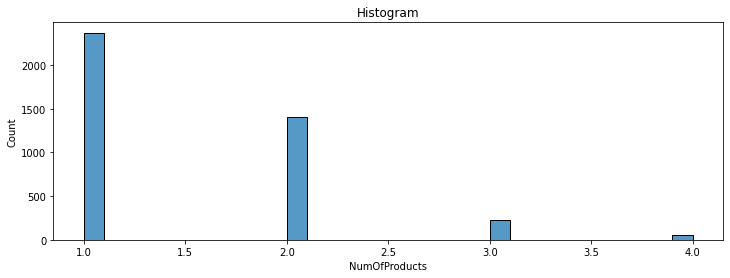

In [ ]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram')

## <font color = 'pickle'>**Visualizing Relationships between variables**

### <font color = 'pickle'>**Correlation Matrix**

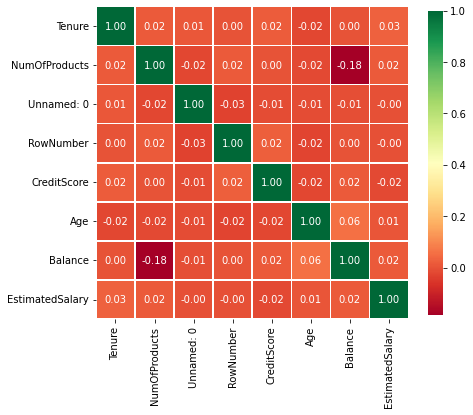

In [ ]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f', 
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* None of the correlations are too high in this dataset.

### <font color = 'pickle'>**Relationship between Target variable and categorical variables**

Now, let's plot a bar-plot of each categorical variable w.r.t. churn rate of each category.


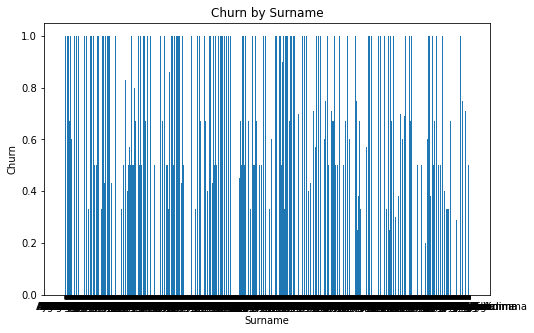

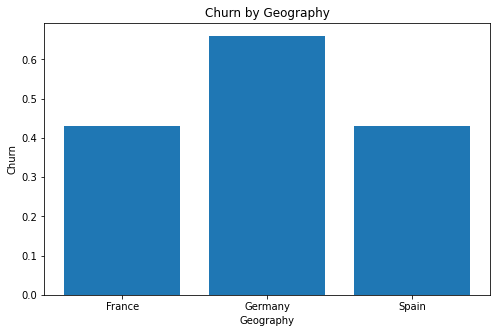

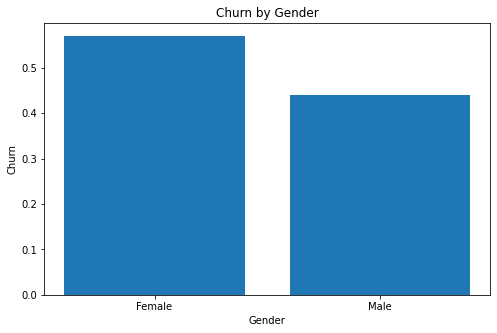

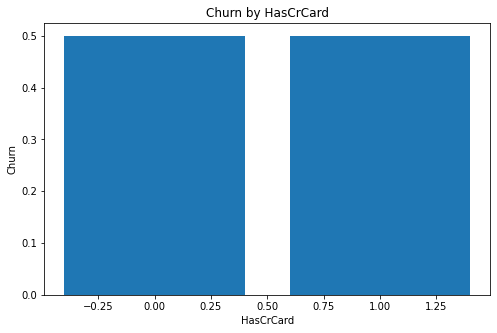

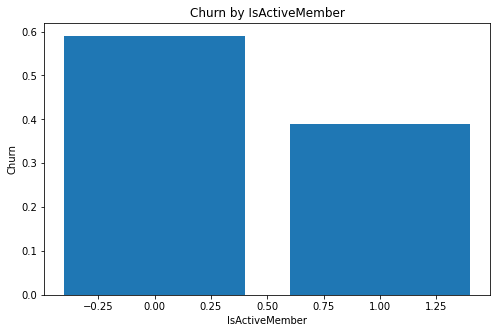

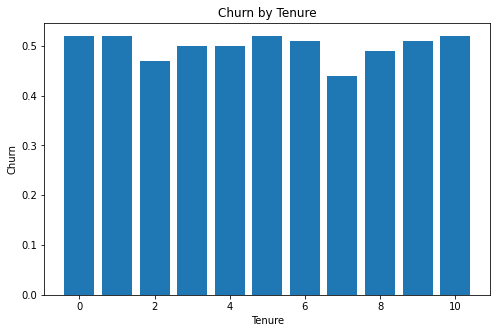

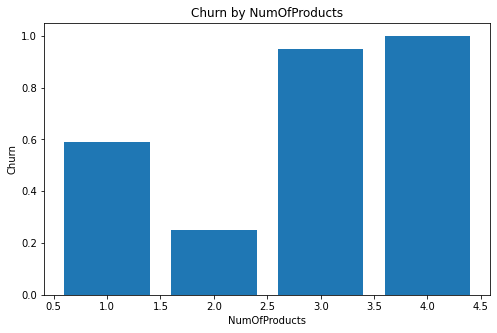

In [ ]:
# Plotting all categorical and discrete features using above function.
for category in categorical + discrete:
  plot_target_by_category(df, 'Exited',category,'Churn')

From the above charts, we can conclude that
- Germany has the highest churn rate.
- Females have a greater churn rate than males.
- Non-active members have a greater churn rate than active members.
- Customer's who have bought more number of products are more likely to churn (exit the company)  compared to customer's buying fewer number of products.

# <font color = 'pickle'>**Conclusion from EDA**</font>
From the above exploration of the data, we can come to some conclusions and they are:-

1. We have checked the number of missing values and we will use imputation methods to handle these missing values.

- Since Age and Geography has lot of missing values (greater than 10%), we can either use (1) mean/median/mode imputation startgeis or (2)   arbitrray value imputation where we will replace missing  values with arbitrray value of 999 and 'missing' for age and Geography respectively. 
We will first try mean/median imputtaion and then finally try arbitrary value imputation.
- For balance, if we ignore zeros then it has normal distribution. One posibility is to first predict zero vs non-zero balance using other independent variables. If the prediction is zero then impute missing values using zero and if it is non-zero then impute missing values using mean(considering only non-zero values. For simplicity, we will use median for balance.
- Tenure is discrete and can take only 11 unique values. All the values from 3 to 9 seems equally likely. Hence we will use RandomSampleImputer for tenure(replace missing values with random values extracted from variable).
- NumOfProducts is discrete variable and can take only four values. One seems to be the most frequent value. The median is also one. So we can impute missing values using median.
- Gender is a ctegorical and has less than 10% missing values. Hence we will impute missing values with most frequent category.

3. From the distribution plot we have checked the distribution of each column. Distribution of 'Age' is skewed in nature. **We will use log transformation for Age.**
4. In our dataset Creditscore and Balance variables have non-standard distributions. Balance has a cluster of zeros and Creditscore has cluster of higher values.
We will use k-means discretization for Credit score and Balance.
5. **We will use onehot encoding for categorical variables: 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'**. Since we have discretized Credit score and balance, **we will use onehot encoding for Creditscore and Balance as well**.
6. In the previous notebook, we found that even after tarnsformation Age still has missing values, hense will use **Winsorization to remove outliers from Age**.
7. Finally, since **Age, Tenure, Num of Products and Estimated salary** have different order of magnitudes, we will scale these varibles.

<font size = 4 color = 'indianred'>**Summary:**

**We will apply following transformation in this order:**</font>
1. Median imputtaion for ['Balance', 'NumOfProducts']
2. Median imputation for Age followed by AddMissing Indicator. We will also try Arbitrary Number imputer for Age (in a different pipeline) (see Round 4)
3. CategoricalImputer(imputation_method = 'frequent') (impute missing value with most frequent category)  for Gender.
4. CategoricalImputer(imputation_method = 'frequent')  for Geography followed by AddMissing Indicator. We will also try CategoricalImputer(imputation_method = 'frequent') in a different pipeline (see round 4).
5. RandomSampleImpuer (impute missing values by random values extracted from variable) for Tenure.
6. Log Transfornation for Age
7. k-means discretization for Creditscore and Balance.
8. One hot encoding encoding for : Geography, Gender, HasCrCard, IsActiveMember, Creditscore and Balance.
9. Winsorization to remove outliers from Age
10. Standard Saclar for Age, Tenure, Num of Products and Estimated salary.

We will create a single pipeline to apply these operations in this oder followed by KNN classification model.



In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis =1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify =y)

#<font color = 'pickle'>**Complete Pipeline**

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', 
     LogTransformer(variables = ['Age']) ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['Balance'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance']
                   ,drop_last= True, ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),

    ('knn',
     KNeighborsClassifier())
])

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1**

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
# now we create the grid with all the parameters that we would like to test

param_grid_1 = {
    # try different feature engineering parameters
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'knn__n_neighbors': [1],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}
# now we set up the grid search with cross-validation
grid_knn_1 = GridSearchCV(churn_pipeline, param_grid_1,
                           cv=5, return_train_score= True)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_1.best_params_)

{'discretizer_bal__transformer__n_bins': 4, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round1 = save_model_folder / 'knn_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'knn_round1_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_knn_1, file_complete_grid_round1)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round1_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

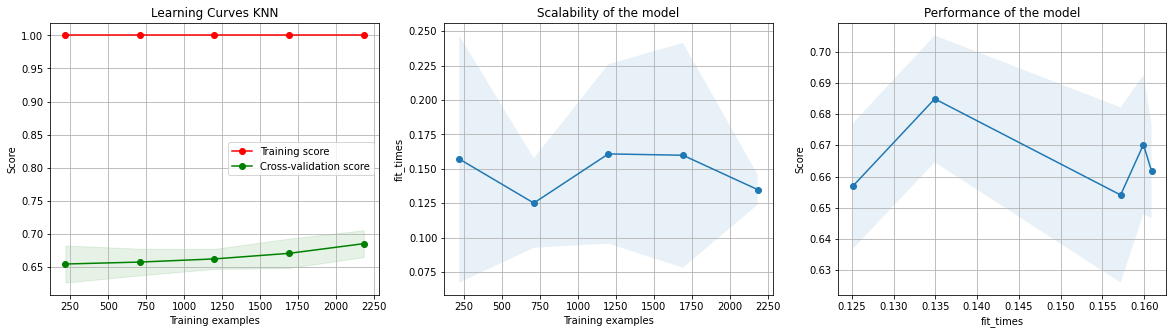

In [ ]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

<font color = indianred>**From the learning curves it is clear that  there is overfitting. We need to reduce model complexity. Let us try to reduce the complexity by increasing n_neighbours**

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round1 .best_score_)

1.0
0.6848788520348152


## <font color = 'pickle'>**Hyperparameter Tuning - Round 2**

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
# now we create the grid with all the parameters that we would like to test

param_grid_2 = {
    # try different feature engineering parameters
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'knn__n_neighbors': range(2, 40, 4),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]

}

# now we set up the grid search with cross-validation
grid_knn_2 = GridSearchCV(churn_pipeline, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_2.fit(X_train,y_train)

{'discretizer_bal__transformer__n_bins': 2, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 34, 'knn__p': 2, 'knn__weights': 'distance', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_2.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round2 = save_model_folder / 'knn_round2_best_estimator.pkl'
file_complete_grid_round2 = save_model_folder / 'knn_round2_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_knn_2, file_complete_grid_round2)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round2_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

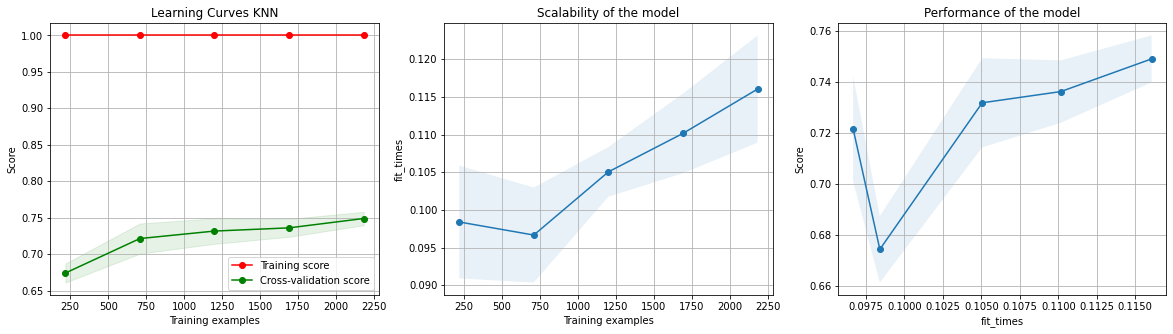

In [ ]:
plot_learning_curve(loaded_best_estimator_round2 , 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round2.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round2.best_score_)

1.0
0.7489968746849481


<font color = indianred>**The cross-validation score has improved. Based on the range and step size, the optimal value of n_neighbours is between 30 and 38. We will do one more round to see if we can improve perormance further.**

## <font color = 'pickle'>**Hyperparameter Tuning - Round 3**

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
param_grid_3 = {
    # try different feature engineering parameters
    
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'knn__n_neighbors': range(30, 38, 1),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]

}

# now we set up the grid search with cross-validation
grid_knn_3 = GridSearchCV(churn_pipeline, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_3.fit(X_train,y_train)

{'discretizer_bal__transformer__n_bins': 6, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 32, 'knn__p': 2, 'knn__weights': 'distance', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_3.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round3 = save_model_folder / 'knn_round3_best_estimator.pkl'
file_complete_grid_round3 = save_model_folder / 'knn_round3_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_3.best_estimator_, file_best_estimator_round3)
joblib.dump(grid_knn_3, file_complete_grid_round3)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round3_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

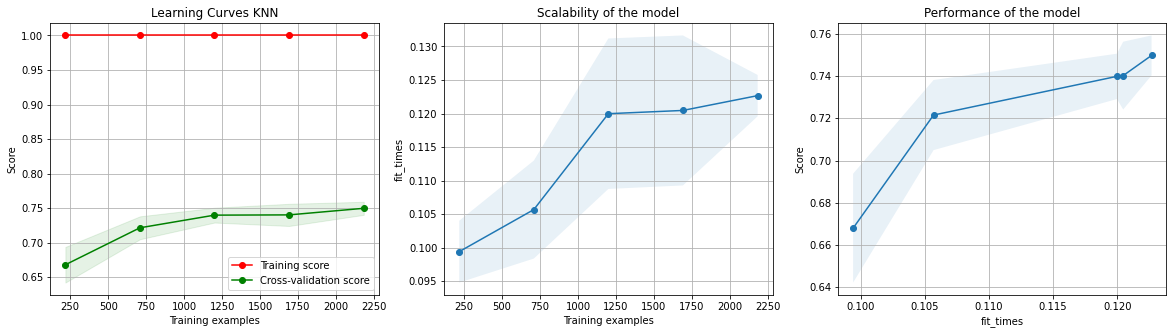

In [ ]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round3.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round3.best_score_)

1.0
0.7497301475283127


<font color = indianred>**It seems that n_neighbours = 32 gives us the best cross-validation results.** The learning curves are not ideal. It seems that there is still over-fitting. Adding more data or applying a different model with more regularization might help. We will also try slightly different pipelines with different pre-processing steps now.

## <font color = 'pickle'>**Modify Pipeline - Round 4**
Here we will use arbitrary number imputer for age and CategoricalImputer(imputation_method = 'missing') for Geography. 

### <font color = 'pickle'>**Pipeline**

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_2 = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Balance', 'NumOfProducts'])),

    ('imputer_arbit_number',
      ArbitraryNumberImputer(arbitrary_number=999, variables=['Age'])),

    ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender'])),

    ('imputer_catgorical_missing',
      CategoricalImputer(imputation_method = 'missing', variables=['Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['Balance'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance']
                   ,drop_last= True, ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),

    ('knn',
     KNeighborsClassifier())
])

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
param_grid_4 = {
    # try different feature engineering parameters
    
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler()],
    'knn__n_neighbors': range(30, 38, 1),
    'knn__weights': ['uniform'],
    'knn__p': [1]

}

# now we set up the grid search with cross-validation
grid_knn_4 = GridSearchCV(churn_pipeline_2, param_grid_4,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_4.fit(X_train,y_train)

{'discretizer_bal__transformer__n_bins': 2, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 33, 'knn__p': 1, 'knn__weights': 'uniform', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_4.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round4 = save_model_folder / 'knn_round4_best_estimator.pkl'
file_complete_grid_round4 = save_model_folder / 'knn_round4_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_4.best_estimator_, file_best_estimator_round4)
joblib.dump(grid_knn_4, file_complete_grid_round4)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round4_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)
loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

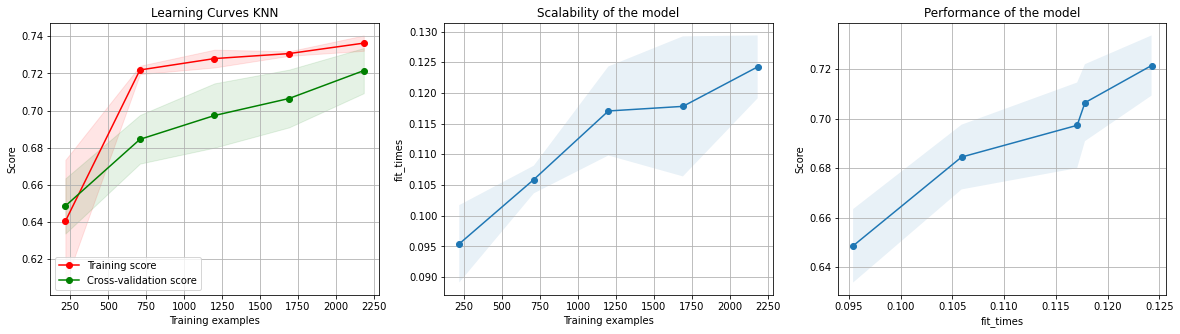

In [ ]:
plot_learning_curve(loaded_best_estimator_round4 , 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round4.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round4.best_score_)

0.7453279589593258
0.7218805659172631


<font color = indianred>**The crossvalidation score has decreased. Hence we will not use this pipeline.**

## <font color = 'pickle'>**Modify Pipeline Round 5**
For categorical variables we have used One hot encoding, We will now try DecisionTreeEncoder. This encoder replaces the categories by the prediction of decision tree. The encoder first fits a decision tree using a single feature and the target (fit). And  then replaces the values of the original feature by the predictions of the tree (transform). The transformer will train a Decision tree per every feature to encode.This can increase the correlation of faetures with outcome. However, it can also lead to overfitting. We will use this only if this gives us better cross validation score.

### <font color = 'pickle'>**Pipeline**

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_3 = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['Balance'])),
    
    ('decision_tree_encoder',
      DecisionTreeEncoder(random_state=123,
                    encoding_method = 'ordered',
                    regression = False,
                    scoring = 'accuracy',
                    variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance'],
                    ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),

    ('knn',
     KNeighborsClassifier())
])

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
param_grid_5 = {
    # try different feature engineering parameters
    
    'discretizer_cs__transformer__n_bins': range(2, 14, 2),
    'discretizer_bal__transformer__n_bins': range(2, 14, 2),
    'scalar__transformer': [StandardScaler()],
    'knn__n_neighbors': range(30, 38, 1),
    'knn__weights': ['uniform'],
    'knn__p': [1]

}

# now we set up the grid search with cross-validation
grid_knn_5 = GridSearchCV(churn_pipeline_3, param_grid_5,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_5.fit(X_train,y_train)

{'discretizer_bal__transformer__n_bins': 2, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 35, 'knn__p': 1, 'knn__weights': 'uniform', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_5.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round5 = save_model_folder / 'knn_round5_best_estimator.pkl'
file_complete_grid_round5 = save_model_folder / 'knn_round5_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_5.best_estimator_, file_best_estimator_round5)
joblib.dump(grid_knn_5, file_complete_grid_round5)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round5_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round5 = joblib.load(file_best_estimator_round5)
loaded_complete_grid_round5 = joblib.load(file_complete_grid_round5)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

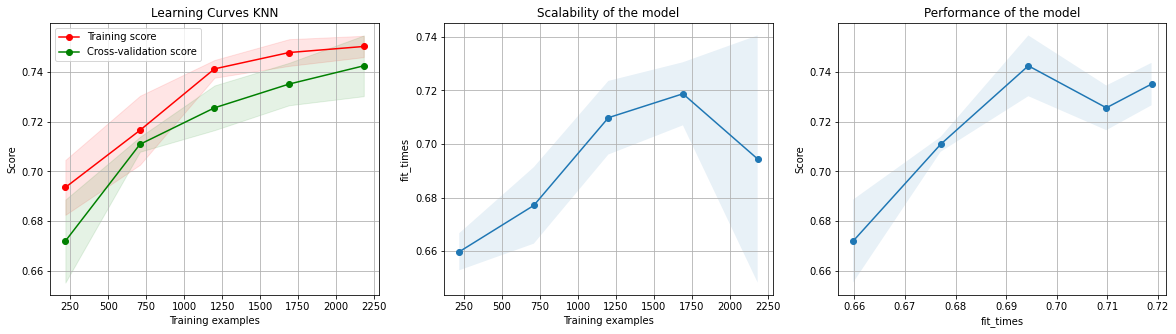

In [ ]:
plot_learning_curve(loaded_best_estimator_round5  , 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round5.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round5.best_score_)

0.7526566507878344
0.7423960748731391


<font color = indianred>**The learning curve of round 5 indicates  that we might get better results if we train the model further.** we will increase model complexity by decreasing the range of n_neighbors.

## <font color = 'pickle'>**Hyperparameter tuning - Round 6**

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
param_grid_6 = {
    # try different feature engineering parameters
    
    'discretizer_cs__transformer__n_bins': range(2, 14, 2),
    'discretizer_bal__transformer__n_bins': range(2, 14, 2),
    'scalar__transformer': [StandardScaler()],
    'knn__n_neighbors': range(20, 30, 1),
    'knn__weights': ['uniform'],
    'knn__p': [1]

}

# now we set up the grid search with cross-validation
grid_knn_6 = GridSearchCV(churn_pipeline_3, param_grid_6,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_6.fit(X_train,y_train)

{'discretizer_bal__transformer__n_bins': 12, 'discretizer_cs__transformer__n_bins': 2, 'knn__n_neighbors': 27, 'knn__p': 1, 'knn__weights': 'uniform', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_6.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round6 = save_model_folder / 'knn_round6_best_estimator.pkl'
file_complete_grid_round6 = save_model_folder / 'knn_round6_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_6.best_estimator_, file_best_estimator_round6)
joblib.dump(grid_knn_6, file_complete_grid_round6)

['/content/drive/MyDrive/data/models/ml_fall_2022/knn_round6_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round6 = joblib.load(file_best_estimator_round6)
loaded_complete_grid_round6 = joblib.load(file_complete_grid_round6)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

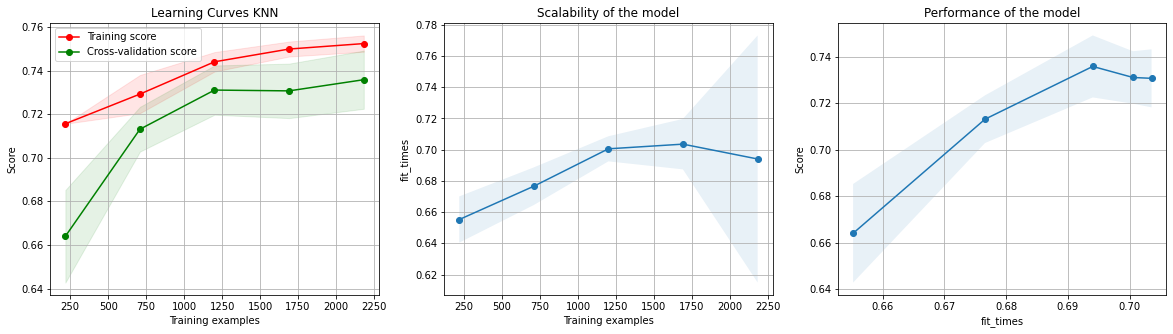

In [ ]:
plot_learning_curve(loaded_best_estimator_round6, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round6.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round6.best_score_)

0.7563209967020886
0.7372611486372954


<font color = indianred>**The training score has improved but the cross validation scorr has decresed. Hence it seems that further finetuning will not help. The cross-validation score of round 3 is 0.749 and for round 5 is 0.742**.</font> We will explore churn_pipeline and churn_pipeline_3 with logistic regression in next lecture. The performance of round 3 and 5 are very similar. However, the fit times of round 3 are much smaller than round 5. **Beacuse of that it seem that model at the end of round 3 might be the best model.**

# <font color = 'pickle'>**Perfromnace on Test Data**

## <font color = 'pickle'> **Test Accuracy** using best model (Round 3 pipeline)

We will now use saved model from round 3 to check teh accuracy on test dataset.

### <font color = 'pickle'>**Load saved Model**

In [ ]:
file_best_estimator_round3 = save_model_folder / 'knn_round3_best_estimator.pkl'
file_complete_grid_round3 = save_model_folder / 'knn_round3_complete_grid.pkl'

In [ ]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

In [ ]:
#let's check the test scores for final model
print(f'Test data accauracy for round 3: {loaded_best_estimator_round3.score(X_test,y_test)}')

Test data accauracy for round 3: 0.7472118959107806


## <font color = 'pickle'> **Confusion Matrix- Round3**

The accuracy gives us the overall accuracy. To see what kind of mistakes model has made, it is good isea to plot the confusion matrix.

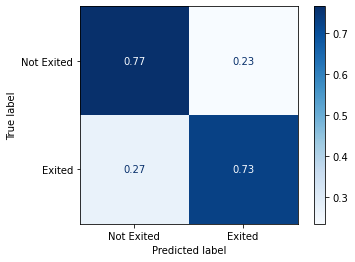

In [ ]:
ConfusionMatrixDisplay.from_estimator(loaded_best_estimator_round3, X_test, y_test,
                                 display_labels=['Not Exited', 'Exited'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

# <font color = 'pickle'>**Final Conclusion**

**Based on pefromnace and fit time, model at the end of round 3 seems like the best model.**. Further, based on learning curves it seems that training model 3 on  more data might also help.